In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity

%matplotlib inline

In [3]:
%run ../IBMCheck.ipynb

-- Ignoring SSL errors.  This is not recommended --
Credits: {'remaining': 15, 'promotional': 0, 'maxUserType': 15}


Backends loaded:
ibmq_qasm_simulator
ibmqx4
ibmqx2
ibmq_16_melbourne


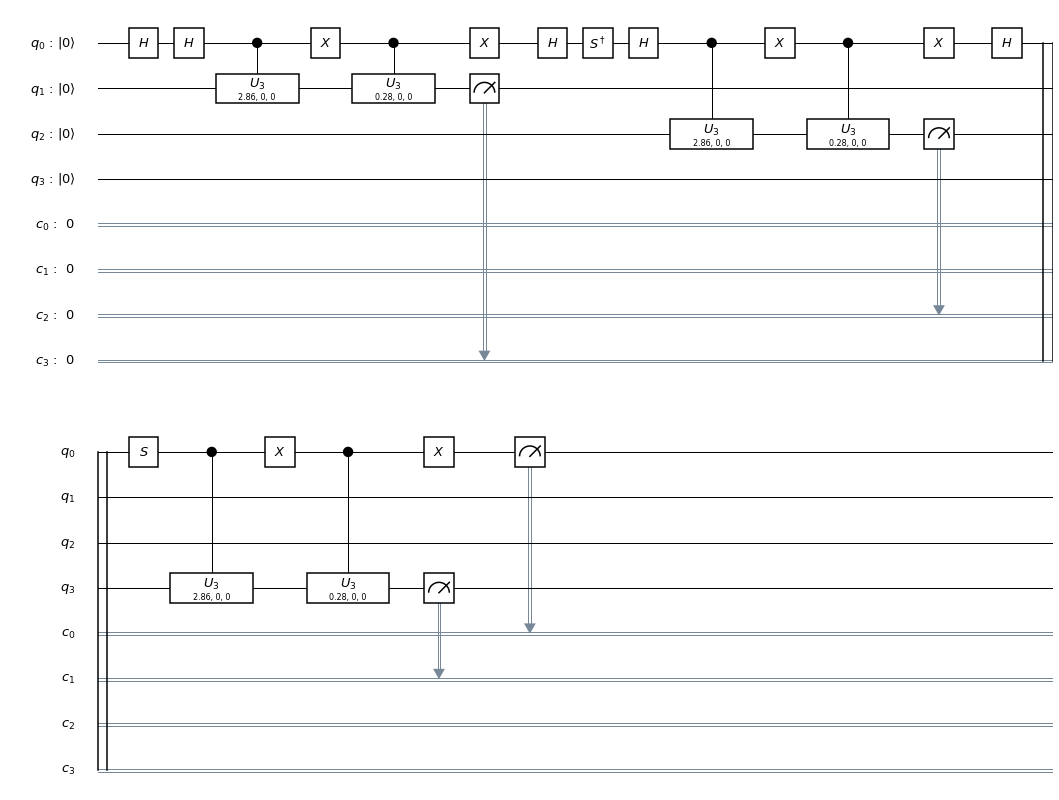

In [4]:
from math import pi
from numpy import arccos,sqrt

def basic_octa_circuit(numqubits,qubit,measdir,ancillas,directions,strenght):
    octa = QuantumCircuit(numqubits,len(ancillas)+1)
    octa.h(qubit)
    angle1=arccos(sqrt((1+strenght)/2))
    angle2=arccos(sqrt((1-strenght)/2))
    for i in range(len(directions)): 
        if directions[i]==2:
            octa.sdg(qubit)
        if directions[i]==1 or directions[i]==2:
            octa.h(qubit)
        octa.cu3(2* angle2,0,0,qubit,ancillas[i])
        octa.x(qubit)
        octa.cu3(2*angle1,0,0,qubit,ancillas[i])
        octa.x(qubit)
        if directions[i]==1 or directions[i]==2:
            octa.h(qubit)
        if directions[i]==2:
            octa.s(qubit)
    if measdir==2:
        octa.sdg(qubit)
    if measdir==1 or measdir==2:
        octa.h(qubit)            
    octa.measure(ancillas+[qubit], [len(directions)-i for i in range(len(directions)+1)])   
    return octa
            
import collections

def eval_Platonic_counts(counts,threshold):
    avg={}
    total={}
    state={}
    for bits in counts:
        if not bits[:-1] in total:
            total[bits[:-1]]=0
            avg[bits[:-1]]=0
        total[bits[:-1]]+=counts[bits]   
        avg[bits[:-1]]+=(-2*int(bits[-1])+1)*counts[bits]
    for dir in total:
        if total[dir]>= threshold:
            state[dir]=avg[dir]/total[dir]
    return state
    #return collections.OrderedDict(sorted(state.items()))

circ=basic_octa_circuit(4,0,3,[1,2,3],[1,2,3],0.96)
circ.draw(output='mpl')

111
112
113
121
122
123
131
132
133
211
212
213
221
222
223
231
232
233
311
312
313
321
322
323
331
332
333


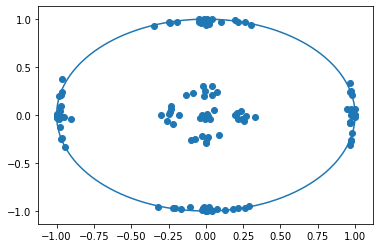

In [5]:
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.aer import QasmSimulator
simulator = Aer.get_backend('qasm_simulator')

simpoints=[]

for i in [1,2,3]:
    for j in [1,2,3]:
        for k in [1,2,3]:
            circ=basic_octa_circuit(4,0,3,[1,2,3],[i,j,k],0.97)
            zstate=eval_Platonic_counts(execute(circ, simulator,shots=8192).result().get_counts(circ),150)
            circ=basic_octa_circuit(4,0,2,[1,2,3],[i,j,k],0.97)
            ystate=eval_Platonic_counts(execute(circ, simulator,shots=8192).result().get_counts(circ),150)

            stateyz={}
            for dirs in zstate:
                if dirs in ystate:
                    stateyz[dirs]=[ystate[dirs],zstate[dirs]]
            simpoints+=stateyz.values()
            
            print(str(i)+str(j)+str(k))

#print(points)

import numpy as np
from matplotlib import pyplot as plt
theta = np.arange(0, 2*np.pi , 0.004)
plt.plot(1 * np.cos(theta), 1 * np.sin(theta))
plt.scatter(*zip(*simpoints))

In [141]:
from qiskit.tools.monitor import job_monitor

# Number of shots to run the program (experiment);
# maximum is 8192 shots.
shots = 8192
# Maximum number of credits to spend on executions.
max_credits = 0

points=[]

for i in [1,2,3]:
    for j in [1,2,3]:
        for k in [1,2,3]:        
            circ=basic_octa_circuit(4,0,3,[1,2,3],[i,j,k],0.97)
            job_exp = execute(circ, hws["ibmqx2"], shots=shots, max_credits=max_credits)
            job_monitor(job_exp)
            zstate=eval_Platonic_counts(job_exp.result().get_counts(),150)
            circ=basic_octa_circuit(4,0,2,[1,2,3],[i,j,k],0.97)
            job_exp = execute(circ, hws["ibmqx2"], shots=shots, max_credits=max_credits)
            job_monitor(job_exp)            
            ystate=eval_Platonic_counts(job_exp.result().get_counts(),150)

            stateyz={}
            for dirs in zstate:
                if dirs in ystate:
                    stateyz[dirs]=[ystate[dirs],zstate[dirs]]
            points+=stateyz.values()
            
            print(str(i)+str(j)+str(k))
            print(api.get_my_credits())

#print(points)

import numpy as np
from matplotlib import pyplot as plt

plt.scatter(*zip(*points))

Job Status: job has successfully run
Job Status: job has successfully run
111
{'remaining': 12, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run
112
{'remaining': 12, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run
113
{'remaining': 12, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run
121
{'remaining': 9, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run
122
{'remaining': 9, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run
123
{'remaining': 9, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run
131
{'remaining': 9, 'promotional': 0, 'maxUserType': 15}
Job Status: job has successfully run
Job Status: job has successfully run

Got a 403 code response to /api/Network/ibm-q/Groups/open/Projects/main/jobs: {"error":{"statusCode":403,"name":"NOT_CREDITS_AVALIABLES","message":"NOT_CREDITS_AVALIABLES","code":"NOT_CREDITS_AVALIABLES"}}


JobError: 'Got a 403 code response to /api/Network/ibm-q/Groups/open/Projects/main/jobs: {"error":{"statusCode":403,"name":"NOT_CREDITS_AVALIABLES","message":"NOT_CREDITS_AVALIABLES","code":"NOT_CREDITS_AVALIABLES"}}'

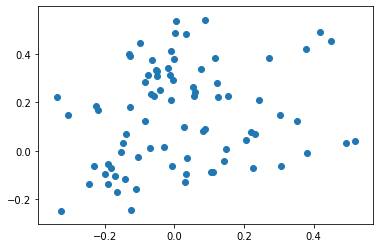

In [146]:
import numpy as np
from matplotlib import pyplot as plt
theta = np.arange(0, 2*np.pi , 0.004)
plt.plot(1 * np.cos(theta), 1 * np.sin(theta))
plt.scatter(*zip(*points))